# Disease Prediction

In [4]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import mode

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB

In [5]:
df = pd.read_csv("/content/improved_disease_dataset.csv")

df.head()

,fever,headache,nausea,vomiting,fatigue,joint_pain,skin_rash,cough,weight_loss,yellow_eyes,disease
0,1,0,1,0,1,0,0,1,1,0,Paralysis (brain hemorrhage)
1,0,0,1,0,0,0,1,1,0,0,Paralysis (brain hemorrhage)
2,0,0,1,0,1,0,1,1,0,0,Paralysis (brain hemorrhage)
3,0,0,1,1,1,0,1,1,1,1,Paralysis (brain hemorrhage)
4,1,0,1,0,1,0,0,0,1,1,Paralysis (brain hemorrhage)


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   fever        2000 non-null   int64 
 1   headache     2000 non-null   int64 
 2   nausea       2000 non-null   int64 
 3   vomiting     2000 non-null   int64 
 4   fatigue      2000 non-null   int64 
 5   joint_pain   2000 non-null   int64 
 6   skin_rash    2000 non-null   int64 
 7   cough        2000 non-null   int64 
 8   weight_loss  2000 non-null   int64 
 9   yellow_eyes  2000 non-null   int64 
 10  disease      2000 non-null   object
dtypes: int64(10), object(1)
memory usage: 172.0+ KB


In [7]:
len(df["disease"].value_counts())

38

In [8]:
le = LabelEncoder()

df['disease'] = le.fit_transform(df['disease'])

In [9]:
X = df.drop(['disease'], axis=1)
y = df['disease']

X.shape, y.shape

((2000, 10), (2000,))

<Axes: xlabel='disease', ylabel='count'>

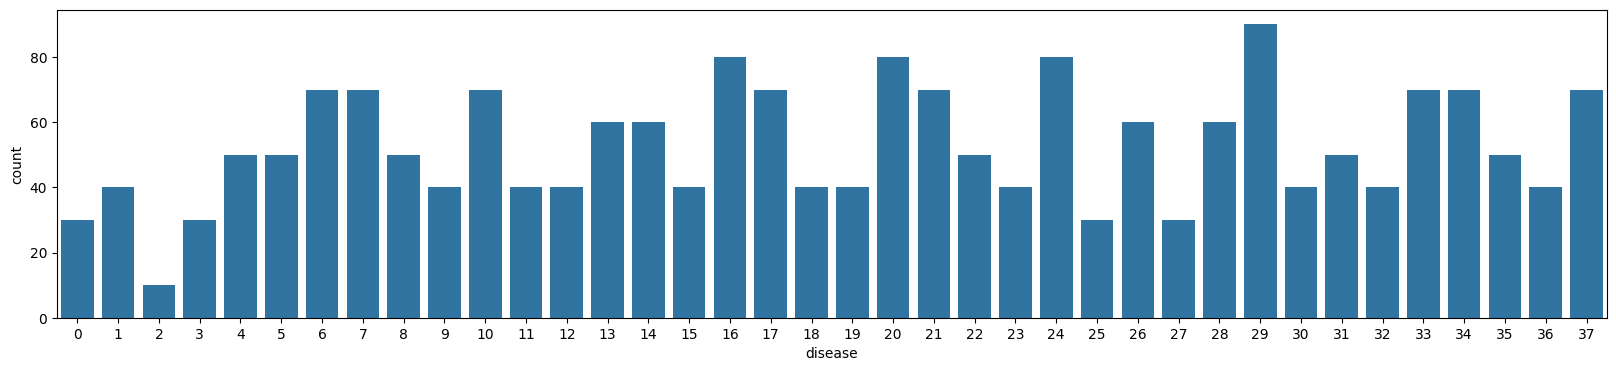

In [10]:
plt.figure(figsize=(20,4))

sns.countplot(x=y)

In [11]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=13)

x_resmapled, y_resampled = ros.fit_resample(X, y)

pd.Series(y_resampled).value_counts()

,count
disease,
29,90
20,90
16,90
24,90
7,90
17,90
34,90
10,90
37,90


In [12]:
if "gender" in x_resmapled.columns:
  le2 = LabelEncoder()
  x_resmapled["gender"] = le2.fit_transform(x_resmapled["gender"])

x_resmapled = x_resmapled.fillna(0)


if len(y_resampled.shape) >1:
  y_resampled = y_resampled.values.ravel()

models = {
    "SVM": SVC(),
    "Decision tree": DecisionTreeClassifier(),
    "Random forest": RandomForestClassifier(),
}

cv_scoring = "accuracy"

startified_kfold = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=13
)
print("startified_kfold", startified_kfold)

for name, model in models.items():

  try:

    scores = cross_val_score(
        model,
        x_resmapled,
        y_resampled,
        cv=startified_kfold,
        scoring=cv_scoring,
        n_jobs=-1,
        error_score="raise"
    )

    print("="*50)
    print(f"Model: {name}")
    print(f"Scores: {scores}")
    print(f"Mean accurancy: {scores.mean():.4f}")

  except Exception as err:

    print(f"{name} model failed with error: {err}")


startified_kfold StratifiedKFold(n_splits=5, random_state=13, shuffle=True)
Model: SVM
Scores: [0.47953216 0.45906433 0.48538012 0.48976608 0.47660819]
Mean accurancy: 0.4781
Model: Decision tree
Scores: [0.51169591 0.50438596 0.52631579 0.52339181 0.48976608]
Mean accurancy: 0.5111
Model: Random forest
Scores: [0.51023392 0.51023392 0.53216374 0.52192982 0.48976608]
Mean accurancy: 0.5129


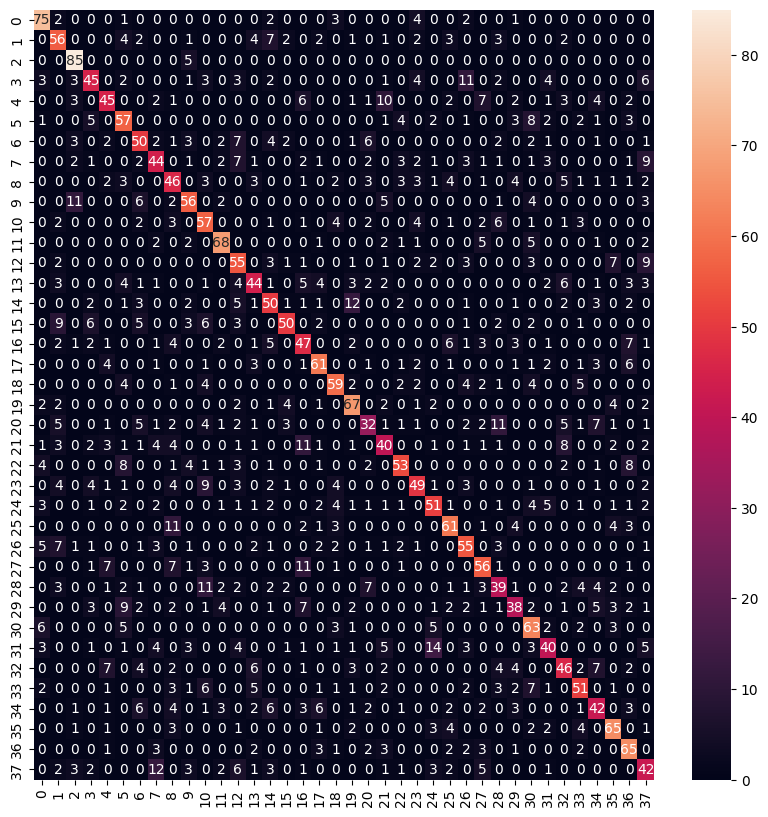

accuracy 58.63%


In [13]:
svm_model = SVC()

svm_model.fit(x_resmapled, y_resampled)

svm_preds = svm_model.predict(x_resmapled)

cf_matrix_svm = confusion_matrix(y_resampled, svm_preds)

plt.figure(figsize=(10,10))

sns.heatmap(cf_matrix_svm, annot=True, fmt="d")

plt.show()

print(f"accuracy {accuracy_score(y_resampled, svm_preds)*100:.2f}%")

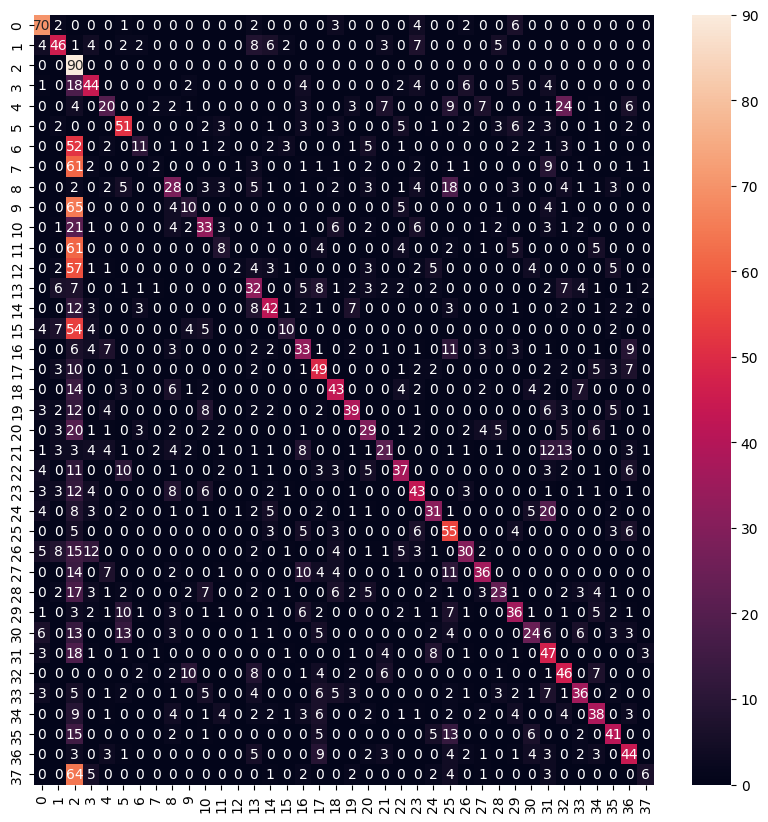

accuracy 37.60%


In [15]:
nb_model = GaussianNB()

nb_model.fit(x_resmapled, y_resampled)

nb_preds = nb_model.predict(x_resmapled)

cf_matrix_nb = confusion_matrix(y_resampled, nb_preds)

plt.figure(figsize=(10,10))

sns.heatmap(cf_matrix_nb, annot=True, fmt="d")

plt.show()

print(f"accuracy {accuracy_score(y_resampled, nb_preds)*100:.2f}%")

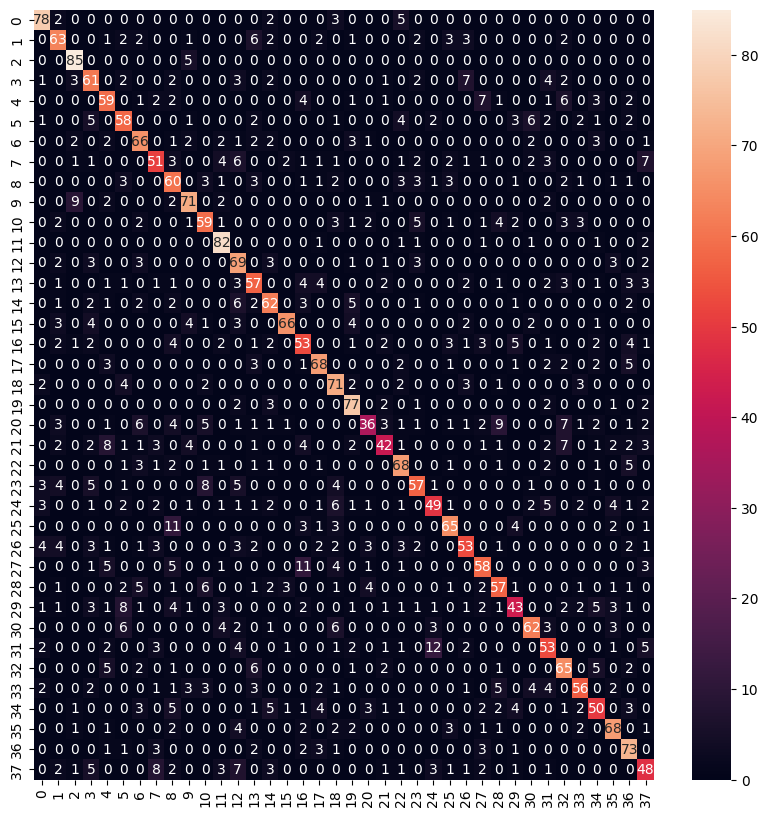

accuracy 67.81%


In [16]:
rf_model = RandomForestClassifier()

rf_model.fit(x_resmapled, y_resampled)

rf_preds = rf_model.predict(x_resmapled)

cf_matrix_rf = confusion_matrix(y_resampled, rf_preds)

plt.figure(figsize=(10,10))

sns.heatmap(cf_matrix_rf, annot=True, fmt="d")

plt.show()

print(f"accuracy {accuracy_score(y_resampled, rf_preds)*100:.2f}%")

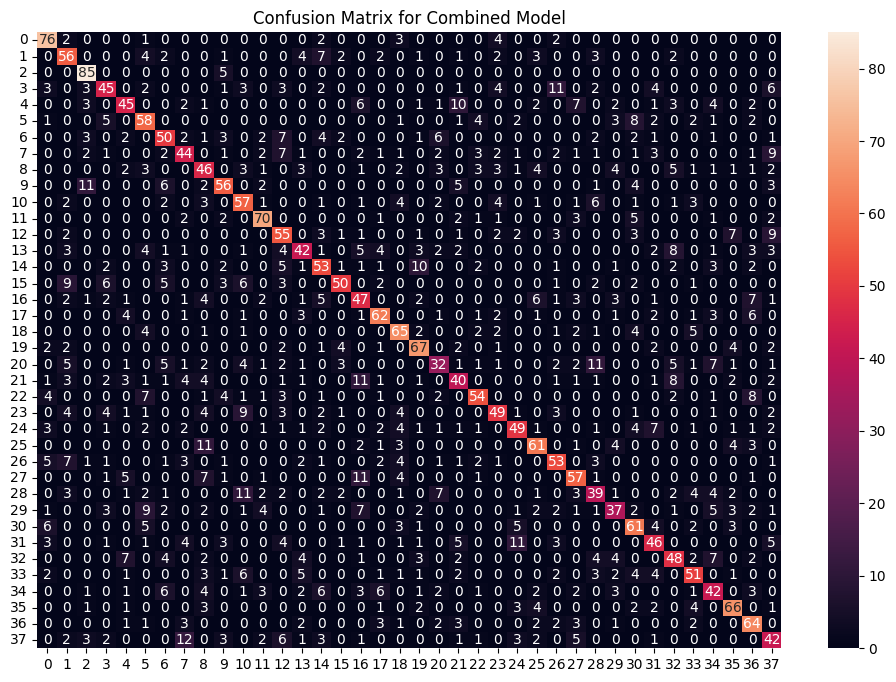

Combined Model Accuracy: 59.06%


In [17]:
from statistics import mode

final_preds = [mode([i, j, k]) for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

cf_matrix_combined = confusion_matrix(y_resampled, final_preds)
plt.figure(figsize=(12, 8))
sns.heatmap(cf_matrix_combined, annot=True, fmt="d")
plt.title("Confusion Matrix for Combined Model")
plt.show()

print(f"Combined Model Accuracy: {accuracy_score(y_resampled, final_preds) * 100:.2f}%")

In [18]:
symptoms = X.columns.values
symptom_index = {symptom: idx for idx, symptom in enumerate(symptoms)}

def predict_disease(input_symptoms):
    input_symptoms = input_symptoms.split(",")
    input_data = [0] * len(symptom_index)

    for symptom in input_symptoms:
        if symptom in symptom_index:
            input_data[symptom_index[symptom]] = 1

    input_data = np.array(input_data).reshape(1, -1)

    rf_pred = le.classes_[rf_model.predict(input_data)[0]]
    nb_pred = le.classes_[nb_model.predict(input_data)[0]]
    svm_pred = le.classes_[svm_model.predict(input_data)[0]]

    final_pred = mode([rf_pred, nb_pred, svm_pred])

    return {
        "Random Forest Prediction": rf_pred,
        "Naive Bayes Prediction": nb_pred,
        "SVM Prediction": svm_pred,
        "Final Prediction": final_pred
    }

print(predict_disease("Itching,Skin Rash,Nodal Skin Eruptions"))

{'Random Forest Prediction': 'Heart attack', 'Naive Bayes Prediction': 'Jaundice', 'SVM Prediction': 'Heart attack', 'Final Prediction': 'Heart attack'}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
